In [1]:
import pyleoclim as pyleo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

In [3]:
logger_75 = pd.read_csv('../data/weather/logger_75_2018_2020.csv',header = 2)

In [4]:
t = pd.to_datetime(logger_75['Date Time - GMT +01:00'],dayfirst=True).to_numpy().astype(float)[10:]

In [5]:
# normalise t to even minutes
t = (t*10e-9)/(60)

In [6]:
t[2]

255627560.0

In [7]:
temperature = pd.to_numeric(logger_75['Temp, (*C)'])[10:]

In [8]:
ts_temp = pyleo.Series(time=t, value=temperature,value_name = "Temperature",value_unit="°C")

In [9]:
# plotting the time series
#ts_temp.plot(title="Temperature at M17")

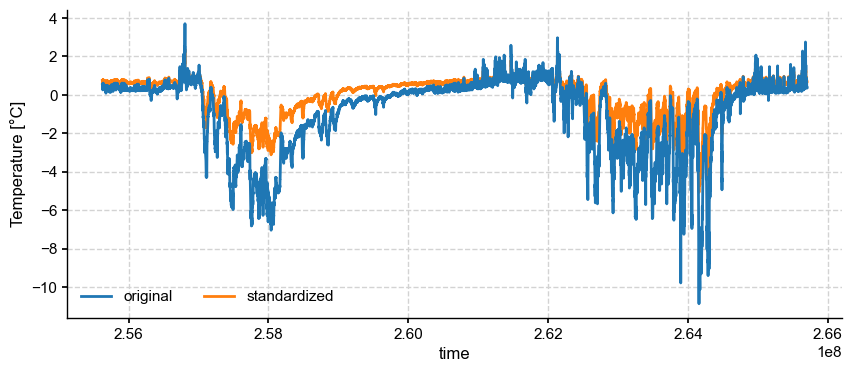

In [10]:
# perform just one standardisation

ts_temp_std = ts_temp.standardize()

fig, ax = ts_temp.plot(label='original', mute=True, zorder=99)  # use mute=True to hold the showing of the figure
ax = ts_temp_std.plot(label='standardized', ax=ax, lgd_kwargs={'ncol': 2})
pyleo.showfig(fig)

In [11]:
#psd_wwz = ts_temp_std.spectral()  # method='wwz' by default 

In [12]:
psd_mtm = ts_temp_std.spectral(method = 'mtm')  # method='wwz' by default 

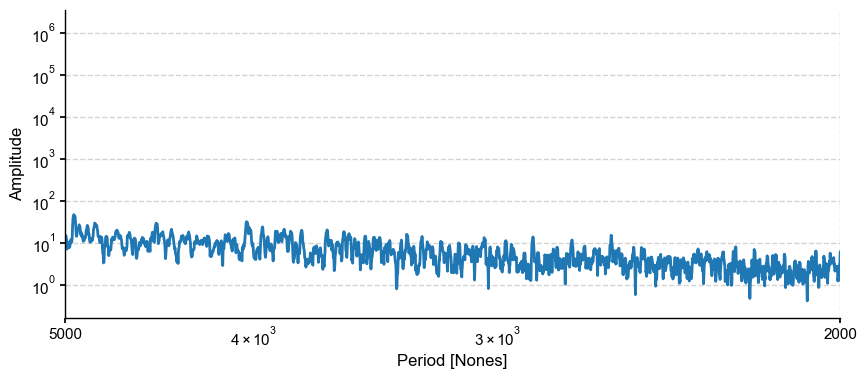

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='Period [Nones]', ylabel='Amplitude'>)

In [13]:
psd_mtm.plot()

In [14]:
psd_mtm_signif = psd_mtm.signif_test(qs=[0.99], number=100)

Performing spectral analysis on surrogates: 100%|██████████| 100/100 [01:46<00:00,  1.06s/it]


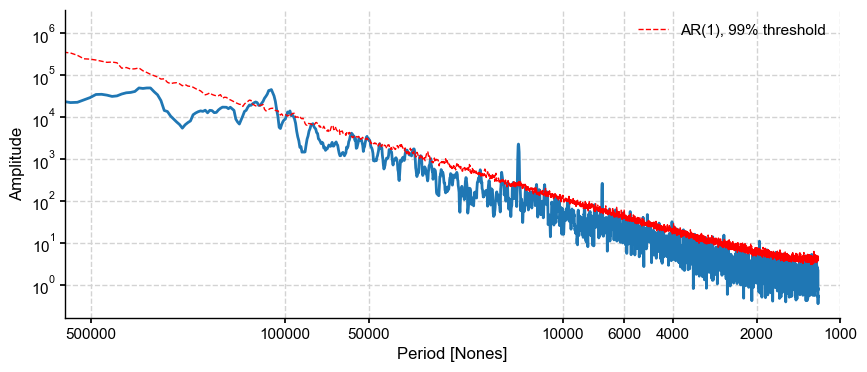

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='Period [Nones]', ylabel='Amplitude'>)

In [15]:
psd_mtm_signif.plot(xlim=(620000,1000),xticks=[500000,100000,50000,10000,6000,4000,2000,1000])

In [ ]:
#scal = ts_temp_std.wavelet()

In [ ]:
#fig, ax = scal.plot()

In [16]:
len(t)

16793

In [17]:
ts_temp_s = pyleo.Series(time=t[0:12000], value=temperature[0:12000],value_name = "Temperature",value_unit="°C")

In [18]:
ts_temp_s_std = ts_temp_s.standardize()

In [ ]:
scal = ts_temp_s_std.wavelet()

In [ ]:
fig, ax = scal.plot(yticks=[500000,200000,100000,50000,20000,10000,5000,2000])